# Fetal Health Classification

**About this dataset**


Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

**Data**  

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal : **1**  
Suspect : **2**  
Pathological : **3**  

**Citation**   
This dataset was provided by:  

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)

## EDA & Data Cleaning

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Preview the first few lines of the CSV file
!head fetal_health.csv

baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137

In [3]:
# Define file path and read the CSV file 
file = "fetal_health.csv"
health_df = pd.read_csv(file)
health_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# Display a summary of the DataFrame and its shape
health_df.info()
print("=" * 50)
print(f'Number of rows: {health_df.shape[0]}, Number of columns: {health_df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# Checking missing values
health_df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
# Check for duplicate rows 
health_df.duplicated().sum()

np.int64(13)

In [7]:
# Display all rows that are duplicates in the DataFrame
health_df[health_df.duplicated(keep=False)]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
67,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
229,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
233,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
304,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
323,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
326,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0


In [8]:
# Drop all duplicate rows from the DataFrame 
health_df.drop_duplicates(inplace=True)

In [9]:
# Check if successful
health_df.duplicated().sum()

np.int64(0)

C:\Users\pc\AppData\Local\Temp\ipykernel_18380\842741685.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(health_suspect, color='yellow', fill=True, alpha=0.3, ax=ax[i])


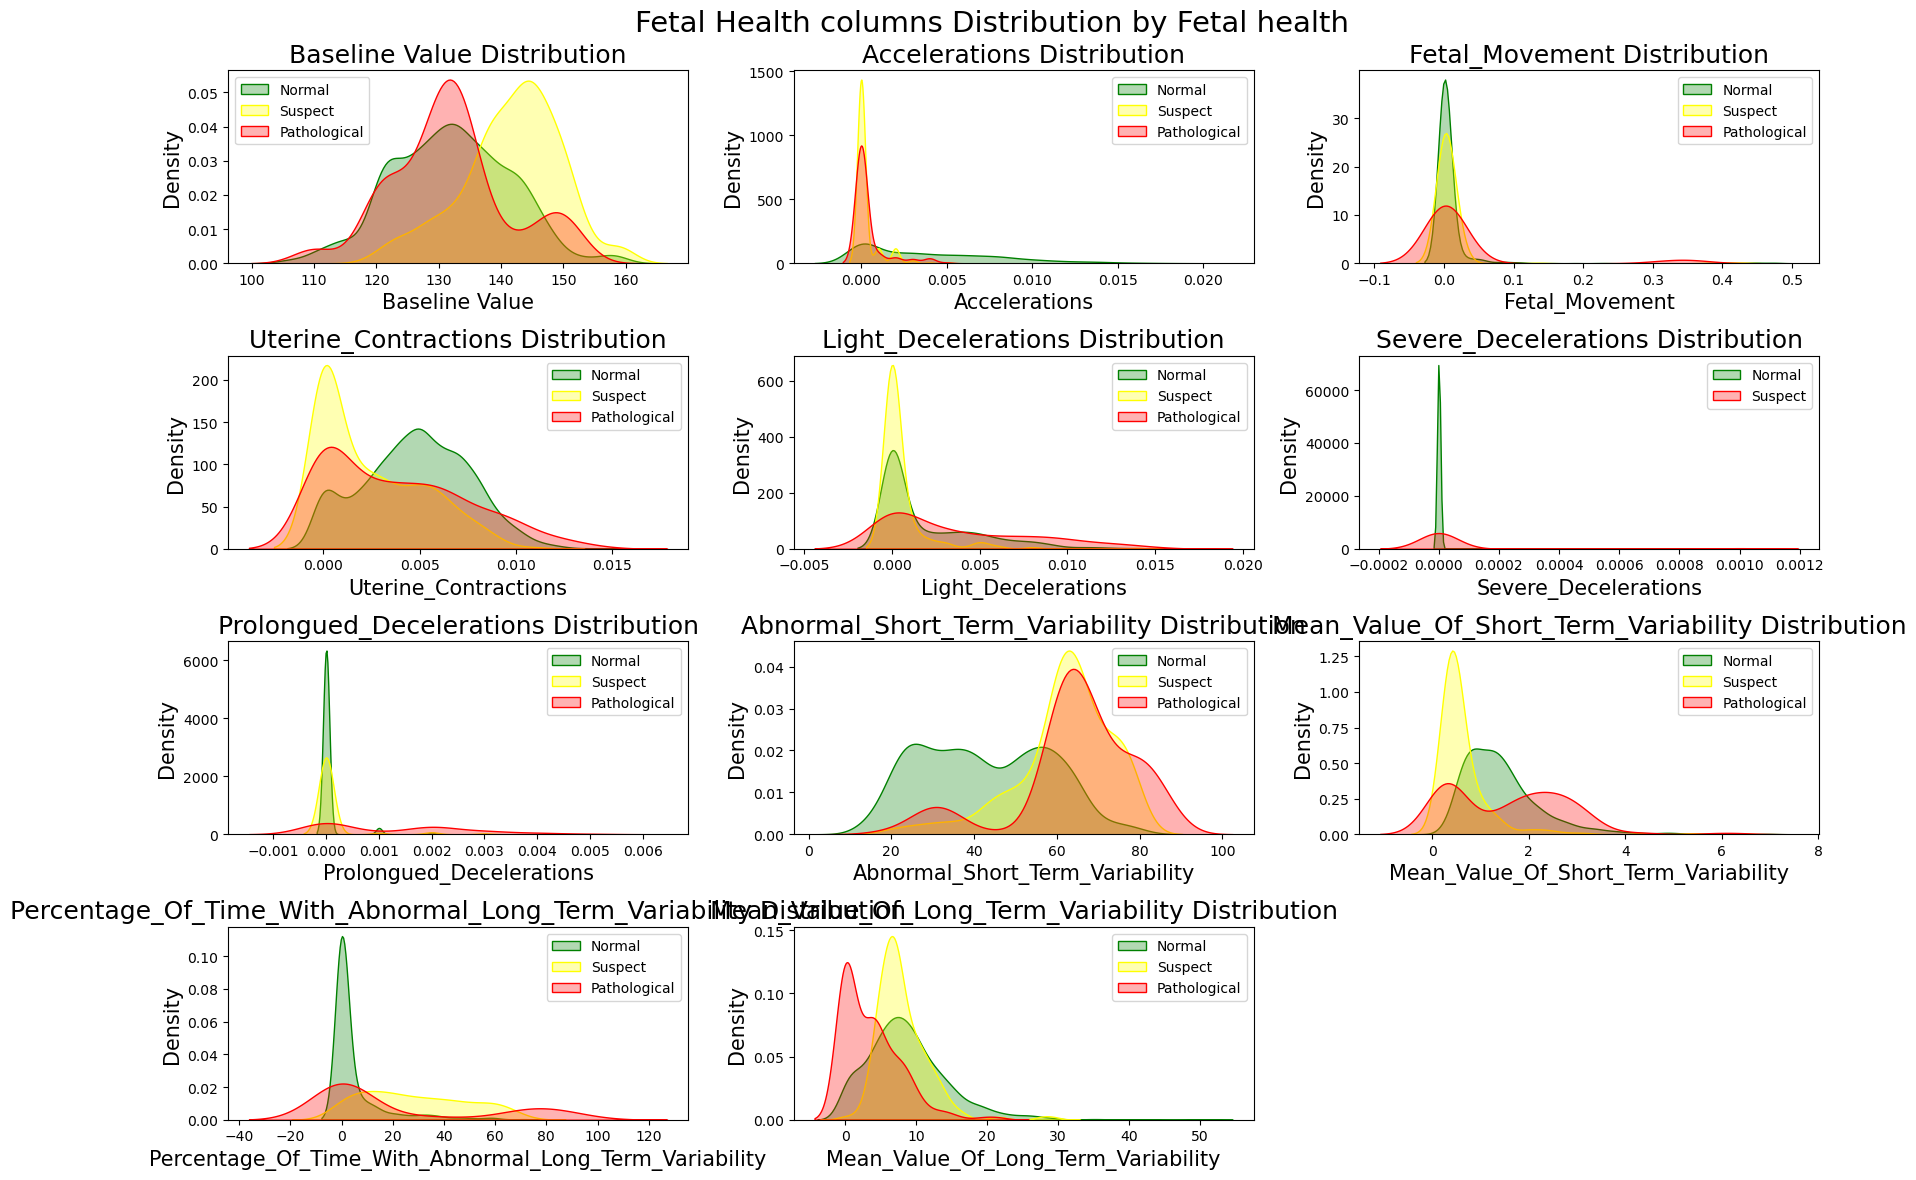

In [10]:
# Inspect the distributions of the selected features with respect to the target column 'fetal_health'
# choose features for the subplots
features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability'
       ]
# choose how many columns you want
num_cols = 3
# set a number of rows
if len(features)%num_cols == 0:
    num_rows = len(features)//num_cols
else:
    num_rows = (len(features)//num_cols) + 1
# define the figure and axes
fig, ax = plt.subplots(figsize=(17,12), 
                       nrows=num_rows, 
                       ncols=num_cols)

ax = ax.flatten()

# add a figure title
fig.suptitle('Fetal Health columns Distribution by Fetal health', 
             fontsize=21)
#use a for loop to create each subplot:
for i, feat in enumerate(features):
    health_normal = health_df[health_df['fetal_health'] == 1][feat]
    health_suspect = health_df[health_df['fetal_health'] == 2][feat]
    health_pathological = health_df[health_df['fetal_health'] == 3][feat]
    sns.kdeplot(health_normal, color='green', fill=True, alpha=0.3, ax=ax[i])
    sns.kdeplot(health_suspect, color='yellow', fill=True, alpha=0.3, ax=ax[i])
    sns.kdeplot(health_pathological, color='red', fill=True, alpha=0.3, ax=ax[i])
    ax[i].set_title(feat.title()+' Distribution', fontsize=18)
    ax[i].set_xlabel(feat.title(), fontsize=15)
    ax[i].set_ylabel('Density', fontsize=15)
    ax[i].legend(['Normal','Suspect','Pathological'])
    
    

# remove unused subplots if any
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

A recurring theme across all features is that their distributions differ depending on the fetal health category, indicating that fetal health status has a strong influence on the feature values.

C:\Users\pc\AppData\Local\Temp\ipykernel_18380\1435375048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=health_df, x="fetal_health", palette={"green","yellow", "red"})


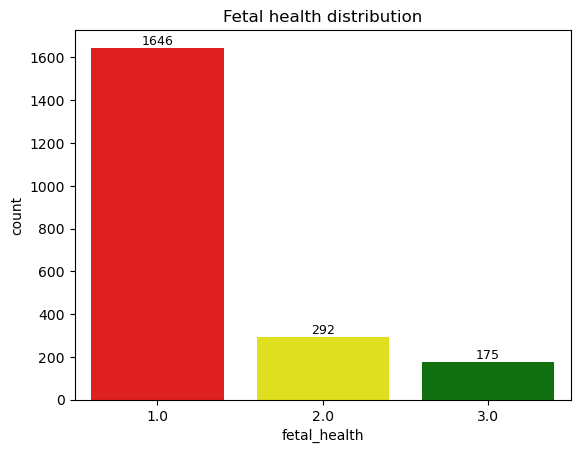

In [25]:
# Plot the distribution of the target variable 'fetal_health'
ax = sns.countplot(data=health_df, x="fetal_health", palette={"green","yellow", "red"})
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)

plt.title('Fetal health distribution')
plt.show()

The distribution of fetal health classes is highly imbalanced, so applying SMOTE will be necessary to address the class imbalance.

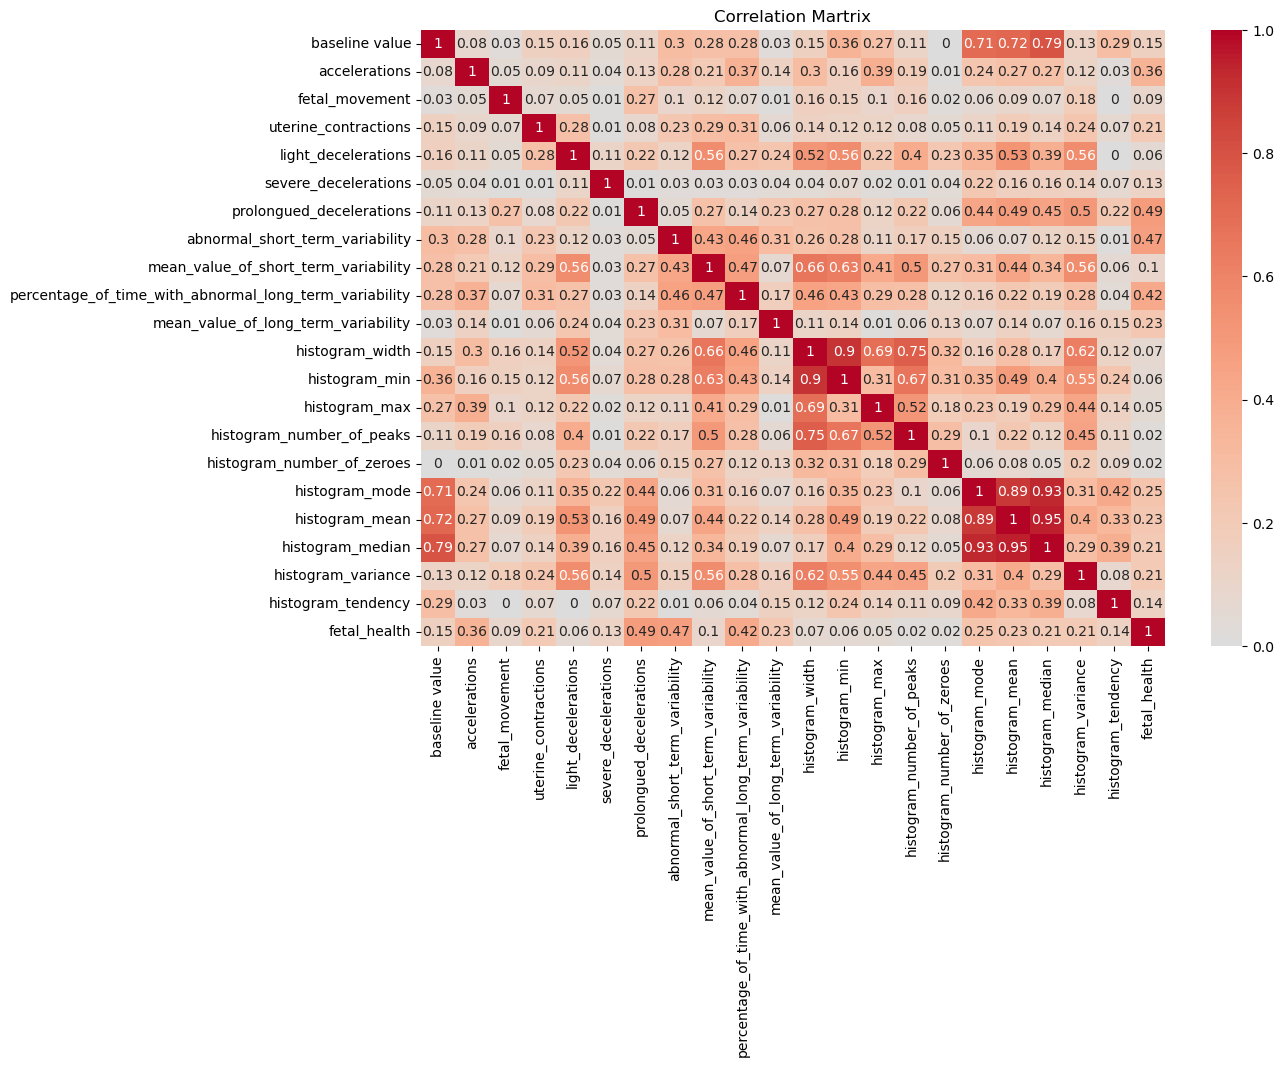

In [12]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
corr_matrix = health_df.corr().round(2).abs()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Martrix")
plt.show()

In [13]:
#  highlight strong correlations between features
indexes = np.tril_indices_from(corr_matrix)
for coord in zip(*indexes):
    corr_matrix.iloc[coord[0], coord[1]] = np.nan

corr_values = (corr_matrix.stack().to_frame().reset_index().rename(
    columns={'level_0':'feature1', 'level_1':'feature2', 0:'correlation'}
))

corr_values.sort_values("correlation", ascending=False).query("correlation > 0.5")

,feature1,feature2,correlation
221,histogram_mean,histogram_median,0.95
217,histogram_mode,histogram_median,0.93
176,histogram_width,histogram_min,0.90
216,histogram_mode,histogram_mean,0.89
17,baseline value,histogram_median,0.79
178,histogram_width,histogram_number_of_peaks,0.75
16,baseline value,histogram_mean,0.72
15,baseline value,histogram_mode,0.71
177,histogram_width,histogram_max,0.69
187,histogram_min,histogram_number_of_peaks,0.67


Both the correlation matrix and the dataframe indicate that some features are moderately to strongly correlated with one another, suggesting that applying PCA would be useful for dimensionality reduction.

## Data preprocessing 

In [14]:
# Import libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target 
X, y = health_df.drop(columns=["fetal_health"]).values, health_df['fetal_health'].values
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Initialize SMOTE for oversampling the minority classes
smote = SMOTE(random_state=1)

# Fit SMOTE on the training data and generate a balanced dataset
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)


from sklearn.preprocessing import StandardScaler
# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_resample)
X_test_std = sc.transform(X_test)

# Print the new counts of each class after SMOTE oversampling
print(f'y_train new counts: \n{pd.Series(y_train_resample).value_counts()}')

y_train new counts: 
2.0    1316
1.0    1316
3.0    1316
Name: count, dtype: int64


In [15]:
from sklearn.decomposition import PCA


# Initialize PCA
pca = PCA(n_components=None)

# Fit PCA on standardized training data and transform it
X_train_pca = pca.fit_transform(X_train_std)

# Extract the variance explained by each principal component
explained_var = pca.explained_variance_

# Calculate cumulative proportion of variance explained (PVE)
cumulative_pve = pca.explained_variance_ratio_.cumsum()

# Create labels for each principal component
pc_labels = [f'PC{i+1}' for i in range(len(explained_var))]

# Combine results into a DataFrame for visualization    
pd.DataFrame({
    "Variance Explained": explained_var,
    "Cumulative PVE": cumulative_pve},
             index=pc_labels)

,Variance Explained,Cumulative PVE
PC1,8.237397,0.392158
PC2,3.010180,0.535463
PC3,1.556061,0.609543
PC4,1.274412,0.670214
PC5,1.231464,0.728840
PC6,0.961205,0.774600
PC7,0.823338,0.813797
PC8,0.770017,0.850455
PC9,0.720485,0.884755
PC10,0.470698,0.907163


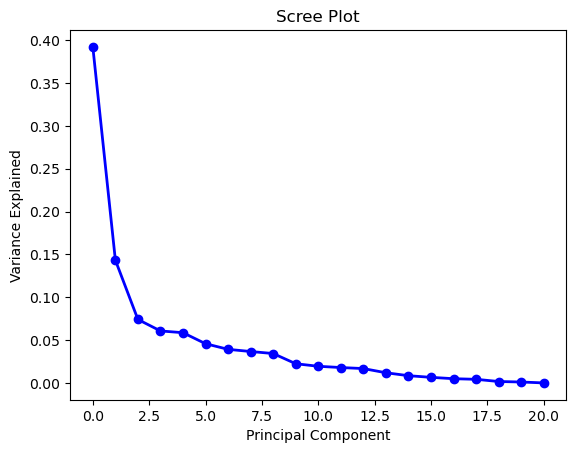

In [16]:
# scree plot to visualize how much variance each principal component explains.
pc_values = np.arange(pca.n_components_) 
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

According to Kaiser’s rule, only principal components with eigenvalues greater than 1 should be kept, which suggests selecting PC1 through PC5. However, the scree plot shows that the ‘elbow’ occurs at PC6, after which the curve flattens, indicating that including PC6 may also be beneficial.

## Models

In [17]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb


# Map the target values from 1,2,3 to 0,1,2 for compatibility with XGBoost
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

# Define the individual classifiers
clf1 = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')
clf3 = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=4, random_state=1)

# Define the pipelines for each classifier with preprocessing steps
pipe1 = Pipeline([['smote', SMOTE()], # Handle class imbalance
                  ['scaler', StandardScaler()], # Standardize features
                  ['PCA', PCA(n_components=6)], # Dimensionality reduction
                  ['Classifier', clf1]]) # Classifier
pipe2 = Pipeline([['smote', SMOTE()],
                  ['scaler', StandardScaler()],
                  ['PCA', PCA(n_components=6)],
                  ['Classifier', clf2]])
pipe3 = Pipeline([['smote', SMOTE()],
                  ['PCA', PCA(n_components=6)],
                  ['Classifier', clf3]])

# Combine all pipelines into a soft voting ensemble classifier
mv_clf = VotingClassifier(estimators=[('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3)], voting='soft')

# List of classifier names 
clf_labels = ['Logistic Regression', 'KNN', 'XGBoost','Majority voting']
all_clf = [pipe1, pipe2, pipe3, mv_clf]

# Perform 10-fold cross-validation using ROC AUC ovr as the scoring metric
print('10-fold cross validation:')
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train_mapped,
                             cv=10,
                             scoring='roc_auc_ovr',
                            n_jobs=-1)
    print(f'ROC AUC: {scores.mean():.2f} 'f'(+/- {scores.std():.2f}) [{label}]')




10-fold cross validation:
ROC AUC: 0.94 (+/- 0.02) [Logistic Regression]
ROC AUC: 0.90 (+/- 0.03) [KNN]
ROC AUC: 0.95 (+/- 0.02) [XGBoost]
ROC AUC: 0.97 (+/- 0.02) [Majority voting]


The application of the majority voting ensemble method enhanced predictive performance compared to the individual classifiers, achieving a ROC AUC score of 0.97.

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


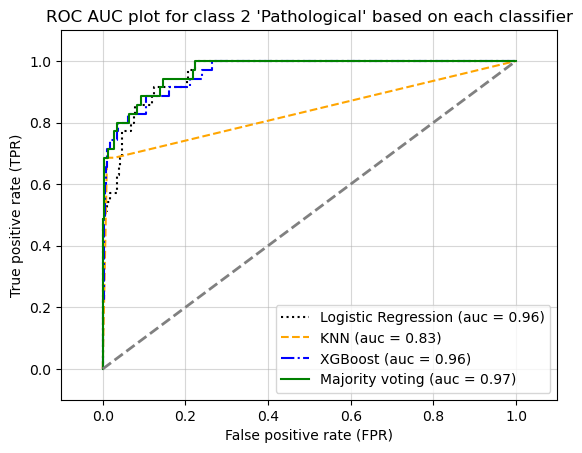

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# roc auc plot for class 2 'Pathological' based on each classifier 
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

# create binary labels for class 2
y_test_class2 = (y_test_mapped == 2).astype(int)

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # probability for class 2
    y_pred = clf.fit(X_train, y_train_mapped).predict_proba(X_test)[:, 2]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test_class2, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label=f'{label} (auc = {roc_auc:.2f})')

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.title("ROC AUC plot for class 2 'Pathological' based on each classifier")
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

In [19]:
# inspect how to implement GridSearchCV
mv_clf.get_params()

{'estimators': [('pipe1',
   Pipeline(steps=[('smote', SMOTE()), ('scaler', StandardScaler()),
                   ('PCA', PCA(n_components=6)),
                   ['Classifier',
                    LogisticRegression(multi_class='ovr', random_state=1,
                                       solver='liblinear')]])),
  ('pipe2',
   Pipeline(steps=[('smote', SMOTE()), ('scaler', StandardScaler()),
                   ('PCA', PCA(n_components=6)),
                   ['Classifier', KNeighborsClassifier(n_neighbors=2)]])),
  ('pipe3',
   Pipeline(steps=[('smote', SMOTE()), ('PCA', PCA(n_components=6)),
                   ['Classifier',
                    XGBClassifier(base_score=None, booster=None, callbacks=None,
                                  colsample_bylevel=None, colsample_bynode=None,
                                  colsample_bytree=None, device=None,
                                  early_stopping_rounds=None,
                                  enable_categorical=False, eval_metri

In [20]:
from sklearn.model_selection import GridSearchCV

# Setting the parameters for each classifier inside the pipelines
params = {'pipe1__Classifier__C' : [0.001, 0.01, 0.1],
          'pipe1__Classifier__multi_class': ['multinomial', 'ovr'],
          'pipe1__Classifier__solver' : ['liblinear','lbfgs'],
          'pipe2__Classifier__n_neighbors' : [1,2,3],
          'pipe3__Classifier__learning_rate' : [0.01,0.05,0.1],
          'pipe3__Classifier__max_depth' : [3,4,5]}

# Initialize GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=mv_clf,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc_ovr',
                    n_jobs=-1)

# Fit GridSearchCV to the training data
grid.fit(X_train, y_train_mapped)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\Anaconda\Lib\site-package

GridSearchCV(cv=10,
             estimator=VotingClassifier(estimators=[('pipe1',
                                                     Pipeline(steps=[('smote',
                                                                      SMOTE()),
                                                                     ('scaler',
                                                                      StandardScaler()),
                                                                     ('PCA',
                                                                      PCA(n_components=6)),
                                                                     ['Classifier',
                                                                      LogisticRegression(multi_class='ovr',
                                                                                         random_state=1,
                                                                                         solver='liblinear')]])),
                                                    ('pipe2',
                                                     Pipeline(steps=[('smote',
                                                                      SMOTE()),
                                                                     ('scaler',
                                                                      StandardScaler()),
                                                                     ('PCA',
                                                                      PCA(n_components=6)),
                                                                     ['Cl...
                                                                                    num_parallel_tree=None, ...)]]))],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'pipe1__Classifier__C': [0.001, 0.01, 0.1],
                         'pipe1__Classifier__multi_class': ['multinomial',
                                                            'ovr'],
                         'pipe1__Classifier__solver': ['liblinear', 'lbfgs'],
                         'pipe2__Classifier__n_neighbors': [1, 2, 3],
                         'pipe3__Classifier__learning_rate': [0.01, 0.05, 0.1],
                         'pipe3__Classifier__max_depth': [3, 4, 5]},
             scoring='roc_auc_ovr')

In [21]:
print(f'Best parameters: {grid.best_params_}')
print(f'ROC AUC : {grid.best_score_:.2f}')

Best parameters: {'pipe1__Classifier__C': 0.1, 'pipe1__Classifier__multi_class': 'multinomial', 'pipe1__Classifier__solver': 'lbfgs', 'pipe2__Classifier__n_neighbors': 1, 'pipe3__Classifier__learning_rate': 0.05, 'pipe3__Classifier__max_depth': 4}
ROC AUC : 0.97


In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report

y_pred_proba = grid.predict_proba(X_test)
y_pred = grid.predict(X_test)

auc = roc_auc_score(y_test_mapped, y_pred_proba, multi_class='ovr', average='weighted')
recall = recall_score(y_test_mapped, y_pred, average="weighted")
precision = precision_score(y_test_mapped, y_pred, average="weighted")
f1_score = f1_score(y_test_mapped, y_pred, average="weighted")

print("********* Results *********")
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)
print("Test ROC AUC (OvR): ",auc)

********* Results *********
Recall      :  0.8770685579196218
Precision   :  0.8973037975268586
F1 Score    :  0.8840842342178932
Test ROC AUC (OvR):  0.9663239439663042


In [23]:
print(classification_report(y_test_mapped, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       330
         1.0       0.56      0.78      0.65        58
         2.0       0.76      0.71      0.74        35

    accuracy                           0.88       423
   macro avg       0.76      0.80      0.78       423
weighted avg       0.90      0.88      0.88       423



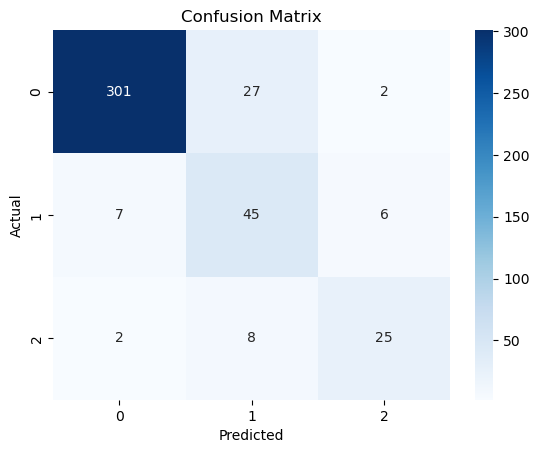

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_mapped, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()